# Nashville Home Price Prediction

## Don't be like Zillow!!
- 2,000 employees losing their jobs, 
- $304 million third quarter write-down
- A spiraling stock price

 It is a warning sign to other businesses  
 Zillow blamed the failure on “Black Swan events” — the pandemic or unprecedented labor.

__Business Problem__  
- Predicting house prices in Nashville area will help real estate agents navigate under uncertain conditions.  
- There is a need and demand for a predictive model.  
- This will be a supervised machine learning model, which means that prior data will be utilized in building the model.  

__Business Objective__  
- Build a model to accurately predict house prices with the available dataset.

This is a dataset from Kaggle. House sale prices from 2013 to 2016. Although I will leave a time for questions at the end, feel free to interrupt for questions.

In [2]:
# We start with importing the basics packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# From scikit learn, more stuff to import
from sklearn.model_selection import GridSearchCV

In [4]:
# Let's load and see the data
df = pd.read_csv('Nashville.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,1/24/13,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/13,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/13,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/13,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/13,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


## Understanding the Data

In [5]:
df.shape

(56636, 31)

We have a good number of entries but we will have the missing value problem, which is coming up soon. The missing value problem was given in the source of the dataset.

In [6]:
# Let's start with data types
df.dtypes

Unnamed: 0                             int64
Unnamed: 0.1                           int64
Parcel ID                             object
Land Use                              object
Property Address                      object
Suite/ Condo   #                      object
Property City                         object
Sale Date                             object
Sale Price                             int64
Legal Reference                       object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
Owner Name                            object
Address                               object
City                                  object
State                                 object
Acreage                              float64
Tax District                          object
Neighborhood                         float64
image                                 object
Land Value                           float64
Building Value                       float64
Total Valu

Objects are strings or a mix of numbers and strings. We have to check each one of them one by one.

### Missing Values

In [7]:
df.isna().sum()

Unnamed: 0                               0
Unnamed: 0.1                             0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

The number of missing values in multiple columns is the same. Probably those entries are missing the same features.

In [8]:
# Some features have 30619 missing values. Let me check when Address is missing, if City is missing too. 
# This is probably true, but better check it.
total = 0
for i in df.index:
    if pd.isna(df['Address'][i]):
        if pd.isna(df['City'][i]):
            total += 1
print(total)

30619


Let's get rid of these 30619 entries first. The missing values are in columns that determine the value of a house. Therefore, there is no point of keeping them.

In [9]:
df.dropna(subset = ['Address'], inplace = True)
df.isna().sum()

Unnamed: 0                               0
Unnamed: 0.1                             0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     26015
Property City                            2
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                             756
Address                                  0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
image                                  682
Land Value                               0
Building Value                           0
Total Value                              0
Finished Ar

In [10]:
df.shape

(26017, 31)

We lost a lot of data but this was expected. We still have more than 26000 which is still plenty. Let's analyze that one now.

### Features

Address and state are not be important, address is unique to every house and state is the same for entry. But city, acreage, tax district are all important. The only state is Tennessee. Let's look at these variables more closely.

In [11]:
print(df['State'].value_counts())
print(df.shape[0])

TN    26017
Name: State, dtype: int64
26017


In [12]:
df.drop(columns = 'State', axis = 1, inplace = True)

In [13]:
df['Tax District'].value_counts()

URBAN SERVICES DISTRICT      20026
GENERAL SERVICES DISTRICT     4556
CITY OF FOREST HILLS           407
CITY OF OAK HILL               393
CITY OF GOODLETTSVILLE         379
CITY OF BELLE MEADE            235
CITY OF BERRY HILL              21
Name: Tax District, dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date',
       'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City',
       'Acreage', 'Tax District', 'Neighborhood', 'image', 'Land Value',
       'Building Value', 'Total Value', 'Finished Area', 'Foundation Type',
       'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath',
       'Half Bath'],
      dtype='object')

In [15]:
df['Land Use'].value_counts()

SINGLE FAMILY                                 21877
DUPLEX                                         1253
VACANT RESIDENTIAL LAND                        1245
ZERO LOT LINE                                   845
VACANT RES LAND                                 445
TRIPLEX                                          84
RESIDENTIAL COMBO/MISC                           76
QUADPLEX                                         36
CHURCH                                           32
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         16
SPLIT CLASS                                      15
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
VACANT COMMERCIAL LAND                            9
PARSONAGE                                         5
VACANT RESIENTIAL LAND                            3
GREENBELT/RES\r\nGRRENBELT/RES                    3
VACANT ZONED

In [16]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date',
       'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City',
       'Acreage', 'Tax District', 'Neighborhood', 'image', 'Land Value',
       'Building Value', 'Total Value', 'Finished Area', 'Foundation Type',
       'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath',
       'Half Bath'],
      dtype='object')

In [17]:
# 'Suite/ Condo   #' has 26015 blanks
filt = pd.isna(df['Suite/ Condo   #'])
df[~filt].head(30)

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
7822,7822,7822,118 09 0 252.00,ZERO LOT LINE,1129 CLIFTON LN,3-B,NASHVILLE,9/4/13,201000,20130909-0094904,...,113700.0,209700.0,1332.0,CRAWL,1984.0,BRICK,C,2.0,3.0,0.0
24933,24933,24933,159 00 0 205.00,ZERO LOT LINE,1245 OLD HICKORY BLVD,2-A,BRENTWOOD,12/12/14,275000,20141217-0115474,...,145100.0,292000.0,2333.0,CRAWL,1985.0,FRAME,B,2.0,2.0,0.0


There are only two entries with no blanks. We can get rid of this column with no worries.

In [18]:
df.drop(columns = ['Suite/ Condo   #'], axis = 1, inplace = True)

In [19]:
df['Owner Name'].head()

1                STINSON, LAURA M.
2                  NUNES, JARED R.
3                  WHITFORD, KAREN
4    HENDERSON, JAMES P. & LYNN P.
5                   MILLER, JORDAN
Name: Owner Name, dtype: object

Owner name is also something we cannot use. Price is not dependent on who owns it, unless it is a celebrity.

In [20]:
# This is the number of duplicate entries
df.shape[0] - len(pd.unique(df['Owner Name'])) - df['Owner Name'].isna().sum()

5547

In [21]:
#This cell is to determine duplicate owners, but it is not needed. Skip it.
xx = pd.unique(df['Owner Name'])
yy = []
for i in df.index:
    if df['Owner Name'][i] not in xx:
        if not pd.isna(df['Owner Name'][i]):
            yy.append(df['Owner Name'][i])
print(yy[0:5])


[]


In [22]:
df.drop(columns = ['Owner Name'], axis = 1, inplace = True)

In [23]:
df.isna().sum()

Unnamed: 0                              0
Unnamed: 0.1                            0
Parcel ID                               0
Land Use                                0
Property Address                        2
Property City                           2
Sale Date                               0
Sale Price                              0
Legal Reference                         0
Sold As Vacant                          0
Multiple Parcels Involved in Sale       0
Address                                 0
City                                    0
Acreage                                 0
Tax District                            0
Neighborhood                            0
image                                 682
Land Value                              0
Building Value                          0
Total Value                             0
Finished Area                        1851
Foundation Type                      1853
Year Built                           1852
Exterior Wall                     

In [24]:
# Let's look at images
df['image'].head(30)

1     \114000\910001.JPG
2     \131000\191001.JPG
3     \133000\721001.JPG
4     \134000\474001.JPG
5     \134000\656001.JPG
7     \136000\266001.JPG
8     \136000\266001.JPG
9      \137000\81001.JPG
10    \150000\856001.JPG
11    \151000\699001.JPG
12    \151000\814001.JPG
13    \152000\116001.JPG
14    \153000\678001.JPG
15    \153000\751001.JPG
16    \166000\545001.JPG
19    \170000\605001.JPG
20    \171000\988001.JPG
21    \172000\613001.JPG
22    \172000\671001.JPG
23    \173000\171001.JPG
24    \184000\836001.JPG
27    \186000\642001.JPG
33    \190000\687001.JPG
84     \84000\757001.JPG
85     \85000\126001.JPG
86     \85000\617001.JPG
87                   NaN
88                   NaN
89                   NaN
90                   NaN
Name: image, dtype: object

Image cannot be an explaining factor for any feature. Therefore, we get rid of it.

In [25]:
df.drop(columns='image', axis = 1, inplace = True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/13,191500,20130118-0006337,No,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/13,202000,20130124-0008033,No,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/13,32000,20130128-0008863,No,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/13,102000,20130131-0009929,No,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,5,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/13,93736,20130118-0006110,No,...,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


In [26]:
# Let's check the data types of some features
df[['Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath']].dtypes

Finished Area      float64
Foundation Type     object
Year Built         float64
Exterior Wall       object
Grade               object
Bedrooms           float64
Full Bath          float64
Half Bath          float64
dtype: object

The features like 'Finished Area', 'Foundation Type' etc. have very similar missing values. I wonder if these missing values belong to the same data points. If the missing values all belong to the same group, we can just eliminate them. I consider this as a safer choice than filling the missing values with the averages, modes etc.

In [27]:
# I will try different combinations of the features above and see if they 
total = 0
for i in df.index:
    if pd.isna(df['Finished Area'][i]):
        if pd.isna(df['Half Bath'][i]):
            total += 1
print(total)

1735


After checking every feature against 'Finished Area', the features with missing values belong to the same data points. I will remove with 'Finished Area' and see the numbers.

In [28]:
df.dropna(subset = ['Finished Area'], inplace = True)
df.isna().sum()

Unnamed: 0                             0
Unnamed: 0.1                           0
Parcel ID                              0
Land Use                               0
Property Address                       2
Property City                          2
Sale Date                              0
Sale Price                             0
Legal Reference                        0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
Address                                0
City                                   0
Acreage                                0
Tax District                           0
Neighborhood                           0
Land Value                             0
Building Value                         0
Total Value                            0
Finished Area                          0
Foundation Type                        3
Year Built                             2
Exterior Wall                          2
Grade                                  2
Bedrooms        

In [29]:
# I want to see all the columns
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Address,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/13,191500,20130118-0006337,No,No,1802 STEWART PL,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/13,202000,20130124-0008033,No,No,2761 ROSEDALE PL,NASHVILLE,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/13,32000,20130128-0008863,No,No,224 PEACHTREE ST,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/13,102000,20130131-0009929,No,No,316 LUTIE ST,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,5,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/13,93736,20130118-0006110,No,No,2626 FOSTER AVE,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


Some of these features are totally useless, like 'Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Legal Reference'
'Property Address' cannot help too. Let's get rid of these features first. Later, I will check if 'Property City' and 'City' are the same or not.

In [30]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Land Use',
       'Property Address', 'Property City', 'Sale Date', 'Sale Price',
       'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Address', 'City', 'Acreage',
       'Tax District', 'Neighborhood', 'Land Value', 'Building Value',
       'Total Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath'],
      dtype='object')

In [31]:
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Legal Reference', 'Property Address'] , axis = 1, inplace = True)
df.head()

,Land Use,Property City,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Address,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,SINGLE FAMILY,NASHVILLE,1/11/13,191500,No,No,1802 STEWART PL,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,NASHVILLE,1/18/13,202000,No,No,2761 ROSEDALE PL,NASHVILLE,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,NASHVILLE,1/18/13,32000,No,No,224 PEACHTREE ST,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,NASHVILLE,1/23/13,102000,No,No,316 LUTIE ST,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,SINGLE FAMILY,NASHVILLE,1/4/13,93736,No,No,2626 FOSTER AVE,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


In [32]:
# I want to check if 'Property City' and 'City' are the same or not.
total = 0
for i in df.index:
    if df['Property City'][i] == df['City'][i]:
        total += 1
print(f'Total entries is {df.shape[0]} where entries with same value are {total}')

Total entries is 24166 where entries with same value are 24163


In [33]:
filt_sameCity = (df['Property City'] == df['City'])
df[~filt_sameCity].head()

,Land Use,Property City,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Address,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
32116,SINGLE FAMILY,BRENTWOOD,6/5/15,310275,No,No,5180 FRANKLIN PIKE CIR,NASHVILLE,0.61,URBAN SERVICES DISTRICT,4026.0,47000.0,234300.0,281300.0,1647.0,FULL BSMT,1963.0,BRICK,C,3.0,1.0,1.0
43848,SINGLE FAMILY,NaN,2/4/16,465000,No,No,704 CRESCENT RD,NASHVILLE,0.32,URBAN SERVICES DISTRICT,3227.0,220000.0,501100.0,721100.0,4420.0,CRAWL,2016.0,BRICK/FRAME,B,5.0,4.0,1.0
44211,SINGLE FAMILY,NaN,2/24/16,179900,No,No,1622 PORTER AVE,NASHVILLE,0.16,URBAN SERVICES DISTRICT,3627.0,25000.0,283100.0,308100.0,2414.0,CRAWL,2016.0,FRAME,B,4.0,2.0,1.0


There are only 3 values with distinct Property City and City. I will get rid of the Property City column.

In [34]:
df = df[filt_sameCity]
df[~filt_sameCity].head()

/var/folders/nm/4q_z_8sn05lcj4pbs6qf6s7h0000gn/T/ipykernel_80401/1476490455.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~filt_sameCity].head()


,Land Use,Property City,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Address,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath


In [35]:
df.drop(columns = 'Property City', axis = 1, inplace = True)

In [36]:
# Let's have a fresher look at the data
df.shape

(24163, 21)

In [37]:
df.head()

,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Address,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,SINGLE FAMILY,1/11/13,191500,No,No,1802 STEWART PL,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,1/18/13,202000,No,No,2761 ROSEDALE PL,NASHVILLE,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,1/18/13,32000,No,No,224 PEACHTREE ST,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,1/23/13,102000,No,No,316 LUTIE ST,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,SINGLE FAMILY,1/4/13,93736,No,No,2626 FOSTER AVE,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


I think we have the features we want now. Let's go over the missing values one more time.

In [38]:
df.isna().sum()

Land Use                               0
Sale Date                              0
Sale Price                             0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
Address                                0
City                                   0
Acreage                                0
Tax District                           0
Neighborhood                           0
Land Value                             0
Building Value                         0
Total Value                            0
Finished Area                          0
Foundation Type                        3
Year Built                             2
Exterior Wall                          2
Grade                                  2
Bedrooms                              20
Full Bath                              5
Half Bath                            136
dtype: int64

In [39]:
df.columns

Index(['Land Use', 'Sale Date', 'Sale Price', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Address', 'City', 'Acreage',
       'Tax District', 'Neighborhood', 'Land Value', 'Building Value',
       'Total Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath'],
      dtype='object')

In [40]:
df[['Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath']].dtypes

Foundation Type     object
Year Built         float64
Exterior Wall       object
Grade               object
Bedrooms           float64
Full Bath          float64
Half Bath          float64
dtype: object

### Full Bath
We fill in the missing values with the mean.

In [41]:
df['Full Bath'].value_counts

<bound method IndexOpsMixin.value_counts of 1        1.0
2        2.0
3        2.0
4        1.0
5        1.0
        ... 
56605    3.0
56607    3.0
56614    2.0
56615    3.0
56616    1.0
Name: Full Bath, Length: 24163, dtype: float64>

In [42]:
df['Full Bath'].nunique()

11

In [43]:
df['Full Bath'].unique()

array([ 1.,  2.,  4.,  3.,  5.,  6., 10.,  0.,  8.,  7.,  9., nan])

In [44]:
print(df['Full Bath'].mean())
print(round(df['Full Bath'].mean(), 0))
df['Full Bath'] = df['Full Bath'].fillna(round(df['Full Bath'].mean(), 0))

1.895065816706681
2.0


### Half Bath
We assume that if half bath is missing, the house does not have it.

In [45]:
df['Half Bath'][df['Half Bath'].isna()]

2263    NaN
5487    NaN
5846    NaN
5959    NaN
6025    NaN
         ..
53395   NaN
54465   NaN
54835   NaN
56259   NaN
56294   NaN
Name: Half Bath, Length: 136, dtype: float64

I am going to assume that if Half Bath is missing, it does not exist. Or, that unit does not have a half bathroom.

In [46]:
df['Half Bath'] = df['Half Bath'].fillna(0.0)

### Bedrooms
We fill in the missing values with the mean.

In [47]:
print(df['Bedrooms'].mean())
print(df['Bedrooms'].mode())
print(round(df['Bedrooms'].mean(), 0))
df['Bedrooms'] = df['Bedrooms'].fillna(round(df['Bedrooms'].mean(), 0))

3.09149650002071
0    3.0
dtype: float64
3.0


In [48]:
print(df['Bedrooms'][df['Bedrooms'] == 0].count())
print(df['Bedrooms'][df['Bedrooms'] == 3].count())

31
12896


### Grade
We fill in the grade with its mode.

In [49]:
df['Grade'].value_counts()

C       17260
B        3696
D        1984
A         598
X         523
E          60
TCC        20
IDC         3
AAB         3
AAC         3
OFC         2
SRC         1
SSC         1
SRD         1
TFC         1
TCB         1
TAC         1
OMB         1
OFB         1
TCD         1
Name: Grade, dtype: int64

In [50]:
print(df['Grade'].mode())
df['Grade'] = df['Grade'].fillna(df['Grade'].mode())

0    C   
dtype: object


### Foundation Type
We  fill in the missing Foundation Type with its mode

In [51]:
df['Foundation Type'].value_counts()

CRAWL        15386
FULL BSMT     3916
PT BSMT       3200
SLAB          1581
TYPICAL         40
PIERS           37
Name: Foundation Type, dtype: int64

In [52]:
print(df['Foundation Type'].mode())
df['Foundation Type'] = df['Foundation Type'].fillna(df['Foundation Type'].mode())

0    CRAWL
dtype: object


### Year Built
I decided to drop the two  missing values, since replacing year built can be more misleading.

In [53]:
df['Year Built'].value_counts()

1950.0    1153
1930.0    1008
1955.0    1005
1960.0     759
1940.0     751
          ... 
1901.0       1
1799.0       1
1914.0       1
1890.0       1
1832.0       1
Name: Year Built, Length: 126, dtype: int64

In [54]:
df.dropna(subset = ['Year Built'], inplace = True)

### Exterior Wall
We fill in the missing Exterior Wall with its mode

In [55]:
df['Exterior Wall'].value_counts()

BRICK           11940
FRAME            8869
BRICK/FRAME      2601
STONE             331
STUCCO            168
CONC BLK          113
FRAME/STONE       108
LOG                15
METAL              15
PRECAST CONC        1
Name: Exterior Wall, dtype: int64

In [56]:
print(df['Exterior Wall'].mode())
df['Exterior Wall'] = df['Exterior Wall'].fillna(df['Exterior Wall'].mode())

0    BRICK
dtype: object


In [57]:
df.dropna(subset = ['Foundation Type'], inplace = True)

In [58]:
# We are done with missing values
df.isna().sum()

Land Use                             0
Sale Date                            0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Address                              0
City                                 0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

Now we are done with filling in the missing values.

### Last look at data before training

In [59]:
df.describe()

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,2.416000e+04,24160.000000,24160.000000,2.416000e+04,2.416000e+04,2.416000e+04,24160.000000,24160.000000,24160.000000,24160.000000,24160.000000
mean,2.754375e+05,0.454973,4419.936755,6.889078e+04,1.730991e+05,2.446739e+05,1926.928961,1963.743212,3.091432,1.895033,0.283692
std,3.128183e+05,0.818273,2139.762710,1.017926e+05,2.095485e+05,2.849097e+05,1687.017271,26.542779,0.850004,0.954874,0.487756
min,1.000000e+02,0.040000,107.000000,1.000000e+02,1.400000e+03,1.260000e+04,450.000000,1799.000000,0.000000,0.000000,0.000000
25%,1.250000e+05,0.190000,3130.000000,2.160000e+04,8.360000e+04,1.096000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,1.850000e+05,0.270000,4026.000000,2.990000e+04,1.174000e+05,1.545500e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,3.250000e+05,0.450000,6229.000000,6.030000e+04,1.892000e+05,2.780000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,1.235000e+07,47.500000,9530.000000,1.869000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [60]:
correlation  = df.corr()

<AxesSubplot:>

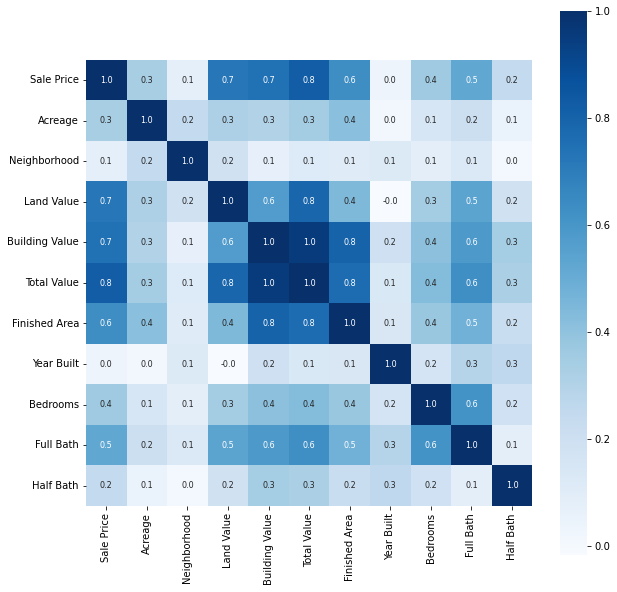

In [61]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

As it can be seen from the heatmap, There is a very strong correlation between Total Value and Building Value. We don't want erronous results. 

In [62]:
df.drop(columns = 'Building Value', axis = 1, inplace = True)

In [63]:
df.drop(columns = 'Total Value', axis = 1, inplace = True)

In [64]:
df.head()

,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Address,City,Acreage,Tax District,Neighborhood,Land Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,SINGLE FAMILY,1/11/13,191500,No,No,1802 STEWART PL,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,1/18/13,202000,No,No,2761 ROSEDALE PL,NASHVILLE,0.11,CITY OF BERRY HILL,9126.0,34000.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,1/18/13,32000,No,No,224 PEACHTREE ST,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,1/23/13,102000,No,No,316 LUTIE ST,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,SINGLE FAMILY,1/4/13,93736,No,No,2626 FOSTER AVE,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


In [65]:
# Address is not a determining factor.
df.drop(columns = 'Address', axis = 1, inplace = True)

### Converting Sale Date
We would like to extract the year from the 'Sale Date' column to include in our analysis.

In [66]:
df['Sale Date'].head()

1    1/11/13
2    1/18/13
3    1/18/13
4    1/23/13
5     1/4/13
Name: Sale Date, dtype: object

In [67]:
df['Sale Year'] = df['Sale Date'].str[-2:]
print(df['Sale Year'])
print(len(df['Sale Year'][4]))

1        13
2        13
3        13
4        13
5        13
         ..
56605    16
56607    16
56614    16
56615    16
56616    16
Name: Sale Year, Length: 24160, dtype: object
2


In [68]:
df.drop(columns = 'Sale Date', axis = 1, inplace = True)

### Sale Price Analysis

In [69]:
df.nlargest(10, ['Sale Price'])

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year
20137,CHURCH,12350000,No,Yes,NASHVILLE,34.64,URBAN SERVICES DISTRICT,4126.0,386400.0,197988.00000,TYPICAL,1980.0,BRICK,TCB,3.0,0.0,0.0,14
4179,SINGLE FAMILY,10750000,No,No,NASHVILLE,0.46,URBAN SERVICES DISTRICT,3727.0,220000.0,4381.79999,PT BSMT,1953.0,BRICK,A,4.0,3.0,1.0,13
1099,SINGLE FAMILY,7200000,No,No,NASHVILLE,7.88,CITY OF BELLE MEADE,9026.0,1830700.0,10519.29993,PT BSMT,1990.0,STONE,X,5.0,8.0,0.0,13
28003,SINGLE FAMILY,5000000,No,Yes,NASHVILLE,2.49,CITY OF FOREST HILLS,4440.0,386800.0,11221.00000,PT BSMT,2005.0,STUCCO,X,5.0,4.0,3.0,15
54377,SINGLE FAMILY,5000000,No,No,NASHVILLE,4.86,CITY OF BELLE MEADE,9026.0,1603800.0,5167.00000,PT BSMT,1929.0,BRICK,X,6.0,4.0,0.0,16
37921,SINGLE FAMILY,4500000,No,No,NASHVILLE,3.53,CITY OF FOREST HILLS,9226.0,500400.0,19728.24988,FULL BSMT,1996.0,BRICK,X,7.0,10.0,0.0,15
30819,SINGLE FAMILY,4450000,No,No,NASHVILLE,5.00,CITY OF OAK HILL,9527.0,625000.0,7894.00000,PT BSMT,1935.0,BRICK,X,5.0,4.0,3.0,15
37569,SINGLE FAMILY,4400000,No,Yes,NASHVILLE,0.14,URBAN SERVICES DISTRICT,1126.0,20000.0,960.00000,CRAWL,1967.0,FRAME,D,3.0,1.0,0.0,15
37570,SINGLE FAMILY,4400000,No,Yes,NASHVILLE,0.14,URBAN SERVICES DISTRICT,1126.0,20000.0,1828.00000,PT BSMT,1967.0,BRICK,C,3.0,1.0,1.0,15
37577,SINGLE FAMILY,4400000,No,Yes,NASHVILLE,0.21,URBAN SERVICES DISTRICT,1126.0,20000.0,2594.00000,FULL BSMT,1963.0,STONE,D,2.0,1.0,1.0,15


In [85]:
print(df['Neighborhood'].value_counts().count())

193


Although 'Neighborhood' looks like a numerical value, it is actually a categorical variable. But there are 193 categories. If the number of categories goes too many, we simply cannot use it. Therefore, we will remove that feature as well.

In [86]:
df.drop(columns = 'Neighborhood', axis = 1, inplace = True)

### Numerical and discrete variables

In [87]:
df.dtypes

Land Use                              object
Sale Price                             int64
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
City                                  object
Acreage                              float64
Tax District                          object
Land Value                           float64
Finished Area                        float64
Foundation Type                       object
Year Built                           float64
Exterior Wall                         object
Grade                                 object
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Sale Year                             object
dtype: object

In [88]:
df.head()

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Land Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year
1,SINGLE FAMILY,191500,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,32000.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,13
2,SINGLE FAMILY,202000,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,34000.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,13
3,SINGLE FAMILY,32000,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,25000.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,13
4,SINGLE FAMILY,102000,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,25000.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,13
5,SINGLE FAMILY,93736,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,25000.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,13


In [89]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes == int or df[feature].dtypes == float]
numerical_features

['Sale Price',
 'Acreage',
 'Land Value',
 'Finished Area',
 'Year Built',
 'Bedrooms',
 'Full Bath',
 'Half Bath']

In [90]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25 and feature not in numerical_features]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 8


In [91]:
discrete_features = [feature for feature in df.columns if feature not in numerical_features]
discrete_features

['Land Use',
 'Sold As Vacant',
 'Multiple Parcels Involved in Sale',
 'City',
 'Tax District',
 'Foundation Type',
 'Exterior Wall',
 'Grade',
 'Sale Year']

In [92]:
df['Grade'].value_counts()

C       17260
B        3695
D        1984
A         598
X         523
E          60
TCC        20
IDC         3
AAB         3
AAC         3
OFC         2
SRC         1
SSC         1
SRD         1
TFC         1
TCB         1
TAC         1
OMB         1
OFB         1
TCD         1
Name: Grade, dtype: int64

In [93]:
print(df['Tax District'].value_counts().count())

7


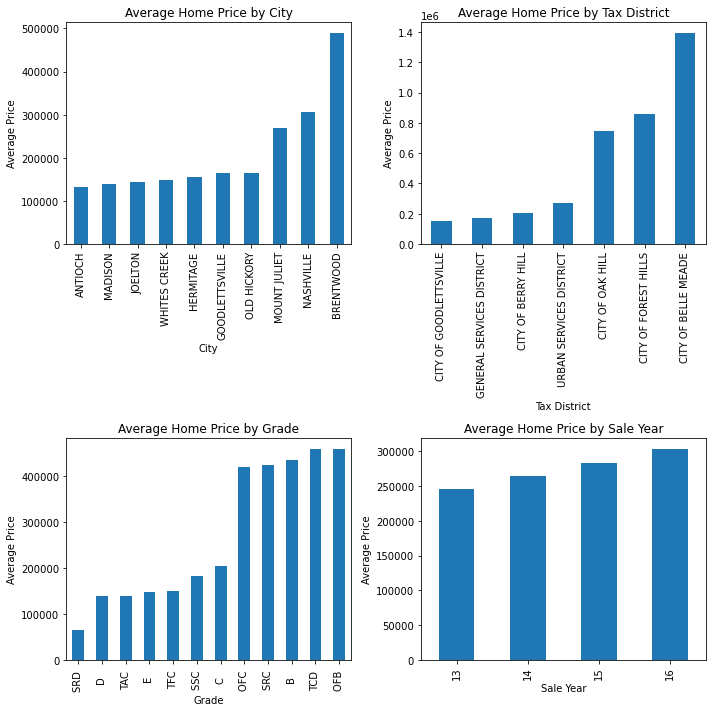

In [94]:
fig_g, axes_g = plt.subplots(2, 2, figsize=(10,10))

df.groupby('City')['Sale Price'].mean().sort_values().plot(kind='bar', ax=axes_g[0,0])
axes_g[0,0].set_title('Average Home Price by City')
axes_g[0,0].set_ylabel('Average Price')

df.groupby('Tax District')['Sale Price'].mean().sort_values().plot(kind='bar', ax=axes_g[0,1])
axes_g[0,1].set_title('Average Home Price by Tax District')
axes_g[0,1].set_ylabel('Average Price')

df.groupby('Grade')['Sale Price'].mean().sort_values()[:12].plot(kind='bar', ax=axes_g[1,0])
axes_g[1,0].set_title('Average Home Price by Grade')
axes_g[1,0].set_ylabel('Average Price')

df.groupby('Sale Year')['Sale Price'].mean().sort_values()[:12].plot(kind='bar', ax=axes_g[1,1])
axes_g[1,1].set_title('Average Home Price by Sale Year')
axes_g[1,1].set_ylabel('Average Price')

plt.tight_layout();

In [95]:
df.to_csv('preprocessed_data.csv', index = False)

In [96]:
print(df.shape)
print('Number of numerical features is ' + str(len(numerical_features)))
print('Number of discreate features is ' + str(len(discrete_features)))

(24160, 17)
Number of numerical features is 8
Number of discreate features is 9


In [97]:
numerical_features

['Sale Price',
 'Acreage',
 'Land Value',
 'Finished Area',
 'Year Built',
 'Bedrooms',
 'Full Bath',
 'Half Bath']

<AxesSubplot:>

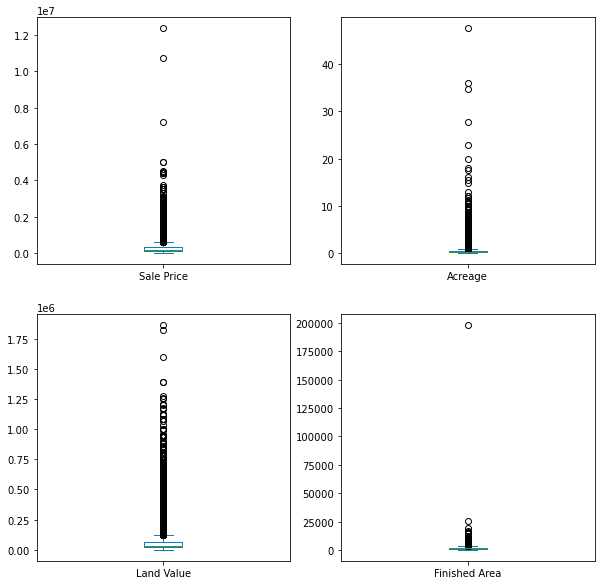

In [98]:
fig_b, axes_b = plt.subplots(2, 2, figsize=(10,10))

df['Sale Price'].plot(kind='box', ax=axes_b[0,0])
df['Acreage'].plot(kind='box', ax=axes_b[0,1])
df['Land Value'].plot(kind='box', ax=axes_b[1,0])
df['Finished Area'].plot(kind='box', ax=axes_b[1,1])

In [99]:
df.describe()

,Sale Price,Acreage,Land Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,2.416000e+04,24160.000000,2.416000e+04,24160.000000,24160.000000,24160.000000,24160.000000,24160.000000
mean,2.754375e+05,0.454973,6.889078e+04,1926.928961,1963.743212,3.091432,1.895033,0.283692
std,3.128183e+05,0.818273,1.017926e+05,1687.017271,26.542779,0.850004,0.954874,0.487756
min,1.000000e+02,0.040000,1.000000e+02,450.000000,1799.000000,0.000000,0.000000,0.000000
25%,1.250000e+05,0.190000,2.160000e+04,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,1.850000e+05,0.270000,2.990000e+04,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,3.250000e+05,0.450000,6.030000e+04,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,1.235000e+07,47.500000,1.869000e+06,197988.000000,2017.000000,11.000000,10.000000,3.000000


## Some Graphs

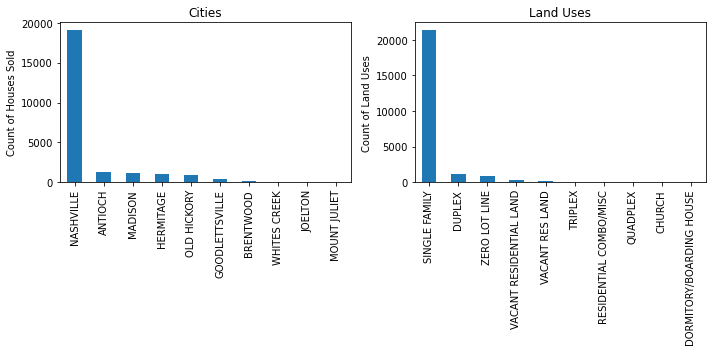

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
df['City'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Cities')
axes[0].set_ylabel('Count of Houses Sold')
df['Land Use'].value_counts()[:10].plot(kind='bar', ax=axes[1])
axes[1].set_title('Land Uses')
axes[1].set_ylabel('Count of Land Uses')
plt.tight_layout();

In [101]:
df['Sale Price'].head()

1    191500
2    202000
3     32000
4    102000
5     93736
Name: Sale Price, dtype: int64

# Dealing with Outliers
I will do the same analyses with removing the outliers

In [159]:
df2 = pd.read_csv('preprocessed_data.csv')
df2.head()

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Land Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year
0,SINGLE FAMILY,191500,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,32000.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,13
1,SINGLE FAMILY,202000,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,34000.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,13
2,SINGLE FAMILY,32000,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,25000.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,13
3,SINGLE FAMILY,102000,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,25000.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,13
4,SINGLE FAMILY,93736,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,25000.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,13


In [173]:
'''
Q1=df2['Sale Price'].quantile(0.25)
Q3=df2['Sale Price'].quantile(0.75)
IQR=Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 5*IQR
print(Lower_Whisker, Upper_Whisker)
'''
# I would like to count the outliers in all numerical features

for i in numerical_features:
    Q1=df2[i].quantile(0.25)
    Q3=df2[i].quantile(0.75)
    IQR=Q3 - Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 5*IQR
    filt3 = df2[i] > Upper_Whisker
    print(df2[i][filt3].count())

353
630
1138
128
0
6031
13
0


In [174]:
print(df2.shape)
Q1=df2['Sale Price'].quantile(0.25)
Q3=df2['Sale Price'].quantile(0.75)
IQR=Q3 - Q1
Upper_Whisker = Q3 + 5*IQR

df2 = df2[df2['Sale Price']< Upper_Whisker]

print(df2.shape)

(24160, 17)
(23802, 17)


In [176]:
df2[discrete_features] = df2[discrete_features].apply(lambda col:df_encoder.fit_transform(col))
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
X2 = df2.drop(['Sale Price'], axis = 1)
y2 = df2['Sale Price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 2)

In [178]:
model_XG2 = XGBRegressor(**params)

In [179]:
model_XG2.fit(X_train2, y_train2)
predictions_train2 = model_XG2.predict(X_train2)
score_a = metrics.r2_score(y_train2, predictions_train2)
predictions_test2 = model_XG2.predict(X_test2)
score_b = metrics.r2_score(y_test2, predictions_test2)
print(score_a)
print(score_b)

0.9518629721321892
0.8328875614005419


The values above are for the dataset with removing outliers.

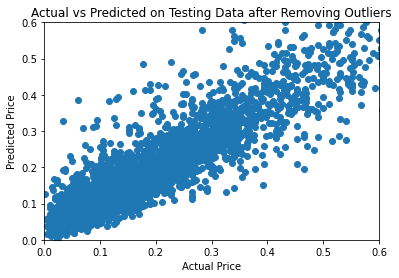

In [181]:
plt.scatter(y_test2, predictions_test2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted on Testing Data after Removing Outliers')
plt.xlim([0,0.6])
plt.ylim([0,0.6])
plt.show()

## LabelEncoder

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
df.dtypes

Land Use                              object
Sale Price                             int64
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
City                                  object
Acreage                              float64
Tax District                          object
Land Value                           float64
Finished Area                        float64
Foundation Type                       object
Year Built                           float64
Exterior Wall                         object
Grade                                 object
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Sale Year                             object
dtype: object

In [104]:
df_encoder = LabelEncoder()

In [105]:
df[discrete_features] = df[discrete_features].apply(lambda col:df_encoder.fit_transform(col))

In [106]:
df[discrete_features].head()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Tax District,Foundation Type,Exterior Wall,Grade,Sale Year
1,18,0,0,7,6,3,0,4,0
2,18,0,0,7,1,4,1,4,0
3,18,0,0,7,6,1,1,3,0
4,18,0,0,7,6,0,3,4,0
5,18,0,0,7,6,0,3,4,0


In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()

In [109]:
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [110]:
df[numerical_features].head()

,Sale Price,Acreage,Land Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
1,0.015498,0.002739,0.017069,0.003539,0.651376,0.181818,0.1,0.000000
2,0.016348,0.001475,0.018139,0.008306,0.922018,0.272727,0.2,0.333333
3,0.002583,0.002739,0.013323,0.008584,0.683486,0.363636,0.2,0.000000
4,0.008251,0.006321,0.013323,0.007690,0.509174,0.181818,0.1,0.000000
5,0.007582,0.002739,0.013323,0.002972,0.669725,0.181818,0.1,0.000000


In [111]:
df.head(10)

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Land Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year
1,18,0.015498,0,0,7,0.002739,6,0.017069,0.003539,3,0.651376,0,4,0.181818,0.1,0.000000,0
2,18,0.016348,0,0,7,0.001475,1,0.018139,0.008306,4,0.922018,1,4,0.272727,0.2,0.333333,0
3,18,0.002583,0,0,7,0.002739,6,0.013323,0.008584,1,0.683486,1,3,0.363636,0.2,0.000000,0
4,18,0.008251,0,0,7,0.006321,6,0.013323,0.007690,0,0.509174,3,4,0.181818,0.1,0.000000,0
5,18,0.007582,0,0,7,0.002739,6,0.013323,0.002972,0,0.669725,3,4,0.181818,0.1,0.000000,0
7,18,0.003555,0,0,7,0.003371,6,0.008508,0.003878,0,0.610092,3,5,0.181818,0.1,0.000000,0
8,18,0.004032,0,0,7,0.003371,6,0.008508,0.003878,0,0.610092,3,5,0.181818,0.1,0.000000,0
9,18,0.002016,0,0,7,0.007585,6,0.013323,0.003554,0,0.669725,3,4,0.181818,0.1,0.000000,0
10,18,0.007279,0,0,7,0.006321,6,0.013323,0.004303,0,0.715596,0,4,0.181818,0.1,0.000000,0
11,18,0.005822,0,0,7,0.004003,6,0.011451,0.003670,0,0.775229,0,4,0.272727,0.1,0.333333,0


In [112]:
X = df.drop(['Sale Price'], axis = 1)
y = df['Sale Price']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [115]:
print(X.shape, X_train.shape, X_test.shape)

(24160, 16) (19328, 16) (4832, 16)


## XGBoost Regressor

In [116]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [139]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [141]:
model_XG = XGBRegressor()
param_grid = {
    'n_estimators': [400, 700],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model_XG, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  13.7s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.8; total time=  14.3s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.9; total time=  15.3s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.7; total time=  18.8s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.7; total time=  16.4s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.8; total time=  17.7s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.9; total time=  18.7s
[CV] END colsample_bytree=0.7, max_depth

[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  12.3s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  13.5s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.8; total time=  15.4s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.9; total time=  12.4s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.7; total time=  17.6s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.8; total time=  17.5s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.8; total time=  15.5s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=

[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  12.4s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.8; total time=  14.5s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.8; total time=  13.8s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.9; total time=  14.2s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.7; total time=  17.9s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.8; total time=  18.6s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.9; total time=  16.9s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.3, subsample=

[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  12.7s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.8; total time=  15.1s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.9; total time=  12.9s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.9; total time=  13.1s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.7; total time=  17.4s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.8; total time=  19.7s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.9; total time=  14.9s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=

0.013392193644006487
{'colsample_bytree': 0.7, 'max_depth': 20, 'n_estimators': 700, 'reg_alpha': 1.1, 'reg_lambda': 1.3, 'subsample': 0.9}
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.7; total time=  17.0s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8; total time=  16.9s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9; total time=  15.1s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.7; total time=  18.8s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8; total time=  17.3s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8; total time=  15.3s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3

[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.1, subsample=0.9; total time=  13.3s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.7; total time=  18.5s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8; total time=  17.8s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9; total time=  15.1s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.7; total time=  19.8s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.7; total time=  17.4s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8; total time=  16.9s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=

[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8; total time=  18.4s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9; total time=  15.2s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9; total time=  13.2s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.7; total time=  19.3s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8; total time=  17.9s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9; total time=  15.3s
[CV] END colsample_bytree=0.8, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  16.2s
[CV] END colsample_bytree=0.8, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=

[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8; total time=  17.3s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8; total time=  14.9s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9; total time=  14.6s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.7; total time=  18.4s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8; total time=  18.5s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9; total time=  14.9s
[CV] END colsample_bytree=0.7, max_depth=20, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9; total time=  12.8s
[CV] END colsample_bytree=0.8, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=

In [142]:
model.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 20,
 'n_estimators': 700,
 'reg_alpha': 1.1,
 'reg_lambda': 1.3,
 'subsample': 0.9}

In [175]:
params = model.best_params_

In [143]:
predict_test = model.predict(X_test)
print(metrics.r2_score(y_test, predict_test))

0.7530695518698267


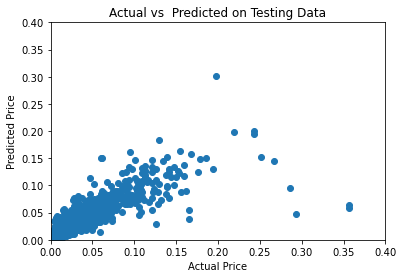

In [145]:
plt.scatter(y_test, predict_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs  Predicted on Testing Data')
plt.xlim([0,0.4])
plt.ylim([0,0.4])
plt.show()

This score is with grid search. The accuracy with default parameters is only 60%

In [144]:
predict_train = model.predict(X_train)
print(metrics.r2_score(y_train, predict_train))

0.8263645524362884


This result is also for the model with grid search.

In [152]:
model_XG.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

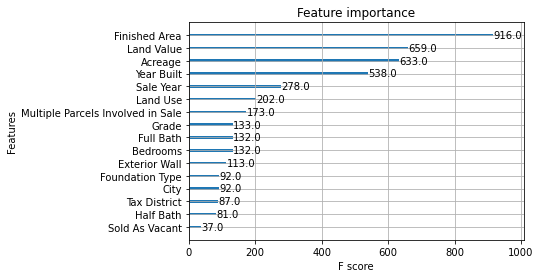

In [154]:
from xgboost import plot_importance
plot_importance(model_XG)
plt.show()

In [119]:
predictions_train = model_XG.predict(X_train)

In [120]:
score_1 = metrics.r2_score(y_train, predictions_train)
score_1

0.9641121366811648

In [121]:
score_2 = metrics.mean_absolute_error(y_train, predictions_train)
score_2

0.0032516524287634968

On test date:

In [122]:
predictions_test = model_XG.predict(X_test)

In [123]:
score_3 = metrics.r2_score(y_test, predictions_test)
score_3

0.6042727903085662

In [124]:
score_4 = metrics.mean_absolute_error(y_test, predictions_test)
score_4

0.004952915829229679

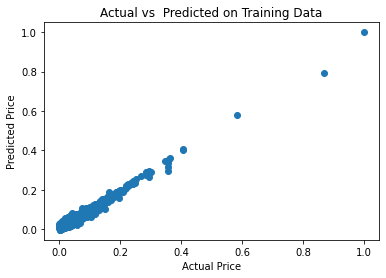

In [125]:
plt.scatter(y_train, predictions_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs  Predicted on Training Data')
plt.show()

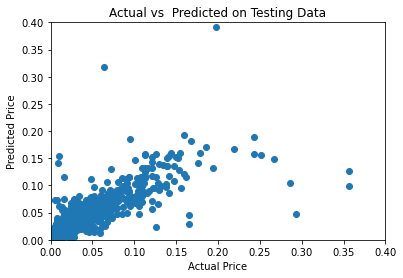

In [128]:
plt.scatter(y_test, predictions_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs  Predicted on Testing Data')
plt.xlim([0,0.4])
plt.ylim([0,0.4])
plt.show()

## Linear Regression

In [129]:
from sklearn.linear_model import LinearRegression

In [134]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [135]:
r_sq_train = model_lr.score(X_train, y_train)
print(r_sq_train)

0.7072792312433829


In [146]:
y_pred_test = model_lr.predict(X_test)
r_sq_test = model_lr.score(X_test, y_test)
print(r_sq_test)

0.6658590893028797


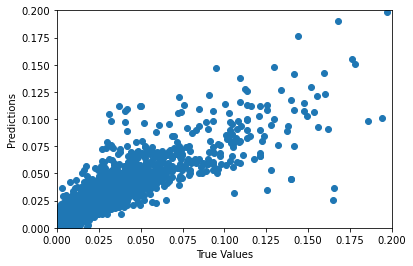

In [149]:
## The line / model
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim([0,0.2])
plt.ylim([0,0.2])
plt.show()

# Conclusion
“What this says to me is that we need to stop over-applying technology in an effort to replace humans, and instead focus on applying technology to make humans better,” York Baur from MoxiWorks.